## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
mouse_metadata_df.head()

# Combine the data into a single dataset
data_merge = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(data_merge["Mouse ID"].unique())
mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse ID g989 is the duplicate
mouse_duplicate = data_merge.loc[data_merge[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"]
mouse_duplicate

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data=pd.DataFrame(mouse_duplicate)
duplicate_data

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study = data_merge[data_merge["Mouse ID"].isin(mouse_duplicate)==False]
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count=mice_study["Mouse ID"].count()
new_mouse_count

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_regimen=mice_study.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = tumor_regimen['Tumor Volume (mm3)'].mean()
median_tumor = tumor_regimen['Tumor Volume (mm3)'].median()
var_tumor = tumor_regimen['Tumor Volume (mm3)'].var()
std_tumor = tumor_regimen['Tumor Volume (mm3)'].std()
sem_tumor = tumor_regimen['Tumor Volume (mm3)'].sem()


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#arrange into a Data Frame
tumor_regimen=pd.DataFrame({
    "Mean tumor vol.": mean_tumor,
    "Median tumor vol.": median_tumor,
    "Tumor vol. variance":var_tumor,
    "Tumor vol. standard deviation": std_tumor,
    "Tumor standard error of the mean": sem_tumor,})
tumor_regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_reg2 = mice_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_reg2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
#create list to view drug regimen counts 
pd_mice = mice_study["Drug Regimen"].value_counts()
pd_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

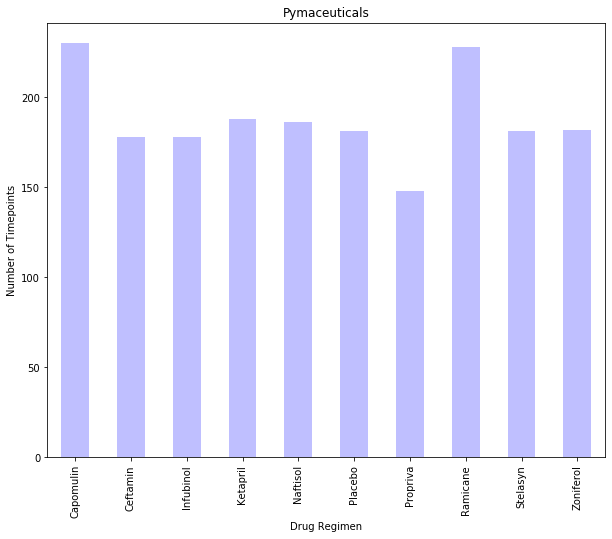

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_mice =  mice_study.groupby(["Drug Regimen"])["Mouse ID"].count()
pd_mice.plot.bar(figsize = (10,8), facecolor = "blue", alpha=0.25)


plt.title("Pymaceuticals")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")

plt.show()


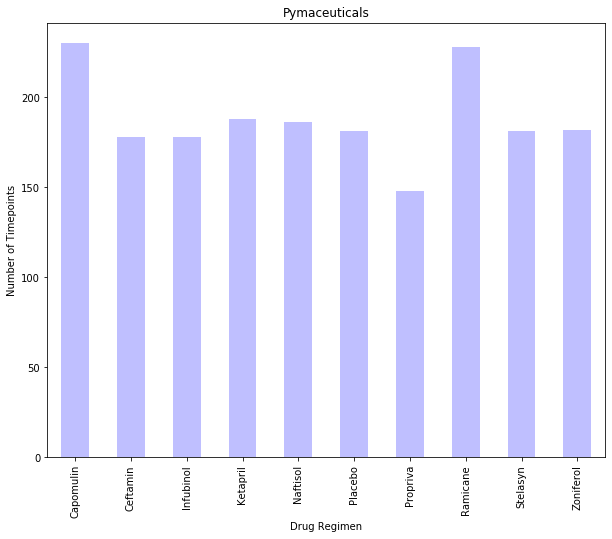

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_bar = mice_study.groupby(["Drug Regimen"])["Mouse ID"].count()


plt.figure(figsize=(10,8))
x_axis = np.arange(len(timepoint_bar))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo",
                           "Infubinol","Ceftamin","Propriva"])

#plots the bar graph
timepoint_bar.plot(kind="bar", facecolor="blue", alpha=0.25,)


# get total regimen data for the bar chart
timepoint_bar=mice_study

#add labels
plt.title("Pymaceuticals")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")


plt.show()


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Generate DF to calculate male/female mice and use the data to create a pie chart
gender_pie=mice_study.groupby("Sex")

gender_pie = pd.DataFrame(gender_pie['Sex'].count())
gender_pie.head()



,Sex
Sex,
Female,922
Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a3413f60>],
      dtype=object)

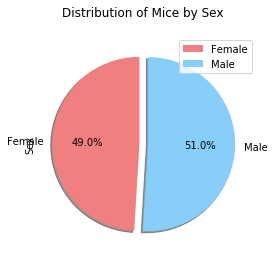

In [14]:
colors= ["lightcoral", "lightskyblue"]
gender_pie.plot(kind="pie",title="Distribution of Mice by Sex", autopct="%1.1f%%", 
                shadow=True, startangle=90, colors=colors, explode=(0.1,0), subplots=True)



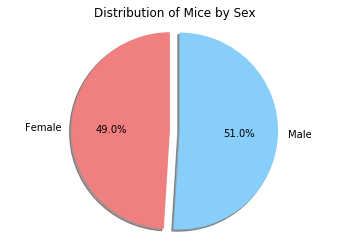

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie_plt=mice_study["Sex"].count()


genders=["Female", "Male"]
colors=["lightcoral", "lightskyblue"]
explode=(0.1,0)
size=[1,1.04]

plt.title("Distribution of Mice by Sex")
plt.pie(size, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90,)
plt.axis("equal")

plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = mice_study.loc[mice_study["Drug Regimen"] == "Capomulin",:]
ramicane= mice_study.loc[mice_study["Drug Regimen"] == "Ramicane", :]
infubinol= mice_study.loc[mice_study["Drug Regimen"] == "Infubinol", :]
ceftamin = mice_study.loc[mice_study["Drug Regimen"] == "Ceftamin", :]
mice_study




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#create a sample mouse to base the scatter plot on
cap_mouse=mice_study.loc[mice_study["Drug Regimen"]=="Capomulin"]
cap_mouse.sample()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
139,m957,Capomulin,Female,3,19,20,38.909349,1


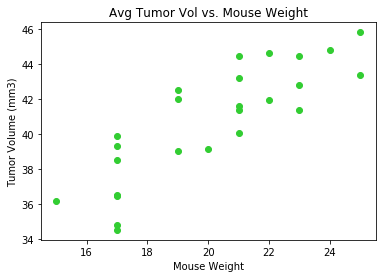

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = mice_study[mice_study['Drug Regimen'] == 'Capomulin']
vol = weight.groupby(["Mouse ID"]).mean()

plt.scatter(vol["Weight (g)"],vol["Tumor Volume (mm3)"], color="limegreen", marker='o') 
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Vol vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_mouse=pd.DataFrame(cap_mouse)
data=pd.DataFrame(cap_mouse)
data["Tumor Volume (mm3)"] = correlation_mouse
correlation_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,s185,0
11,s185,Capomulin,Female,3,17,5,s185,0
12,s185,Capomulin,Female,3,17,10,s185,0
13,s185,Capomulin,Female,3,17,15,s185,0
14,s185,Capomulin,Female,3,17,20,s185,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,i557,1
1452,r157,Capomulin,Male,22,25,0,r157,0
1453,r157,Capomulin,Male,22,25,5,r157,0
1454,r157,Capomulin,Male,22,25,10,r157,0


In [23]:
x_values = correlation_mouse.iloc[:,4]
y_values =correlation_mouse.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="pink")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'